In [1]:
import osmnx as ox

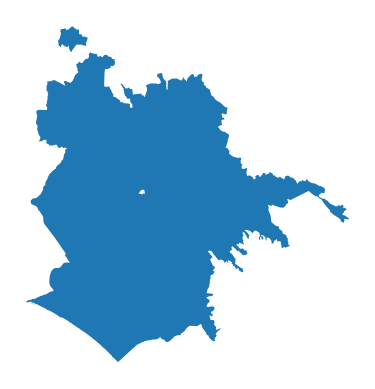

In [45]:
city = ox.geocode_to_gdf('Rome, Italy')
ax = ox.projection.project_gdf(city).plot()
# print(ax.shape)
_ = ax.axis('off')
city_polygon = city['geometry'].values[0]

In [20]:
import random
from shapely.geometry import Point

def generate_random_point(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(p):
            return p

# Generate 2000 points
points = [generate_random_point(city_polygon) for _ in range(2000)]

In [21]:
p = Point(12.2344669, 41.6556417)
city_polygon.contains(p)

False

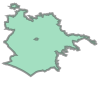

In [39]:
city_polygon

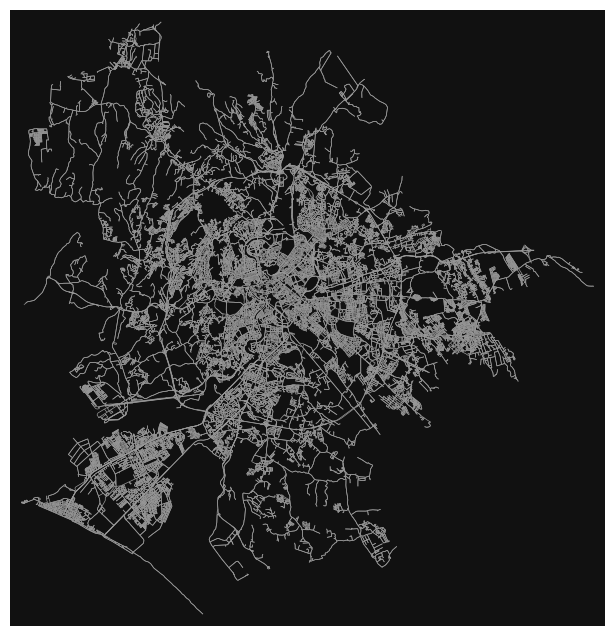

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [17]:
G = ox.graph_from_polygon(city_polygon, network_type='drive')
ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

In [ ]:
for node, data in G.nodes.data():
    print(node, data)

21637960 {'y': 41.7021122, 'x': 12.3483586, 'street_count': 3}
21638011 {'y': 41.7337426, 'x': 12.264032, 'street_count': 3}
21638013 {'y': 41.7322567, 'x': 12.2686838, 'street_count': 3}
21638030 {'y': 41.7267575, 'x': 12.2857285, 'street_count': 3}
21638034 {'y': 41.724389, 'x': 12.2930693, 'street_count': 4}
21638035 {'y': 41.72378, 'x': 12.295012, 'street_count': 3}
21638038 {'y': 41.7230444, 'x': 12.2968851, 'street_count': 4}
21638410 {'y': 41.714662, 'x': 12.3171989, 'street_count': 3}
21638444 {'y': 41.712044, 'x': 12.32298, 'street_count': 3}
25388118 {'y': 41.9007363, 'x': 12.4648873, 'street_count': 4}
25388119 {'y': 41.8995044, 'x': 12.4665271, 'highway': 'traffic_signals', 'street_count': 3}
25388130 {'y': 41.9046697, 'x': 12.4788676, 'street_count': 2}
25388135 {'y': 41.9018143, 'x': 12.463458, 'street_count': 3}
25388138 {'y': 41.8997896, 'x': 12.4642534, 'street_count': 4}
25388157 {'y': 41.8996836, 'x': 12.4625957, 'street_count': 4}
25388174 {'y': 41.9005554, 'x': 12.

In [47]:
import random
from shapely.geometry import LineString, Point

# Number of random edges to select
n = 5

# Step 1: Select n random edges
random_edges = random.sample(list(G.edges(data=True)), n)

# Step 2: For each edge, select a random point along it
random_points = []
for u, v, data in random_edges:
    # Check if the edge has geometry
    if 'geometry' in data:
        line: LineString = data['geometry']
    else:
        # If no geometry, create a straight line between the nodes
        point_u = Point((G.nodes[u]['x'], G.nodes[u]['y']))
        point_v = Point((G.nodes[v]['x'], G.nodes[v]['y']))
        line = LineString([point_u, point_v])
    
    # Step 3: Generate a random point along the line
    random_distance = random.uniform(0, line.length)
    random_point: Point = line.interpolate(random_distance)
    
    # Step 4: Extract lon, lat coordinates
    lon, lat = random_point.x, random_point.y
    random_points.append((lon, lat))

# Print the random points
for i, (lon, lat) in enumerate(random_points, 1):
    print(f"Random Point {i}: Lon = {lon}, Lat = {lat}")

Random Point 1: Lon = 12.53535760901203, Lat = 41.888750632292314
Random Point 2: Lon = 12.498694666060132, Lat = 41.90812587563674
Random Point 3: Lon = 12.536371725101, Lat = 41.96791557489803
Random Point 4: Lon = 12.637772039138106, Lat = 41.857690976512096
Random Point 5: Lon = 12.514789665783024, Lat = 41.77568643478698
